#  Designing a Fair and Transparent Machine Learning Model for Staff Promotion Decisions in Large Organizations
                                          by 
                                Irene Ufuoma Ayakazi  
                                
                        CASE STUDY : YAKUB TRADING GROUP

Abdullah’s Baba Yakub, 38, is the heir apparent to the highly revered Yakub business dynasty. The enterprise has spanned decades with vast investment interest in all the various sectors of the economy.
Abdullah has worked for 16 years in Europe and America after his first and second degrees at Harvard University where he studied Engineering and Business Management. He is a very experienced technocrat a
nd a global business leader who rose through the rank to become a Senior Vice President at a leading US business conglomerate.
His dad is now 70 and has invited him to take over the company with a mandate to take it to the next level of growth as a sustainable legacy. Abdullah is trusted by his father and his siblings to lead this mandate.
On resumption, he had an open house with the staff to share his vision and to listen to them on how to take the business to the next level. Beyond the general operational issues and increasing need for regulatory
compliance, one of the issues raised by the staff was a general concern on the process of staff promotion. Many of the staff allege that it is skewed and biased. Abdullah understood the concern and promised to address it in a most scientific way.
You have been called in by Abdullah to use your data analysis skills to study the pattern of promotion. With this insight, he can understand the important features among available features that can be used to recommend promotion eligibility.




# STEP 1 

# Define the Problem
- What are you predicting? ( employee promotion)
 
- What is the target variable? ( Promoted_or_Not)
  
- What is the business goal? ( improve fairness, increase retention)


# STEP 2

# Import all the neccessary Libraries and upload dataset

In [1]:
# STEP 1Import Required Libraries
import pandas as pd 
import numpy as np
import os 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# STEP 2 LOAD YOUR DATASET
df = pd.read_csv("promotion_dataset.csv")

In [ ]:
# CARRIED OUT EXPLORATORY DATA ANALYSIS (EDA)

In [3]:
# VIEW 5 FIRST ROW
df.head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
0,YAK/S/00001,Commercial Sales and Marketing,MSc MBA and PhD,Female,Direct Internal process,2,1986,12.5,2011,1,0,41,ANAMBRA,No,Married,No,No,0,0
1,YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1991,12.5,2015,0,0,52,ANAMBRA,Yes,Married,No,No,0,0
2,YAK/S/00003,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1987,7.5,2012,0,0,42,KATSINA,Yes,Married,No,No,0,0
3,YAK/S/00004,Commercial Sales and Marketing,First Degree or HND,Male,Agency and others,3,1982,2.5,2009,0,0,42,NIGER,Yes,Single,No,No,1,0
4,YAK/S/00006,Information and Strategy,First Degree or HND,Male,Direct Internal process,3,1990,7.5,2012,0,0,77,AKWA IBOM,Yes,Married,No,No,1,0



### 📋 **Dataset Features and Descriptions**

- **`EmployeeNo`**:  
  A unique identifier automatically assigned to each employee in the system.

- **`Division`**:  
  The specific operational department or unit where the employee currently works (e.g., Finance, HR, Sales).

- **`Qualification`**:  
  The highest academic or professional qualification attained by the employee (e.g., BSc, MSc, PhD).

- **`Gender`**:  
  The employee’s gender, typically recorded as **Male** or **Female**.

- **`ChannelofRecruitment`**:  
  The method through which the employee was hired — such as **internal recruitment**, **agent**, or **special referral**.

- **`Trainings_Attended`**:  
  The total number of both paid and unpaid training programs the employee participated in during the previous business cycle.

- **`Yearofbirth`**:  
  The year the employee was born, used to calculate age.

- **`LastPerformanceScore`**:  
  The employee’s overall performance score from the previous year, rated on a scale from **0 to 14** by HR.

- **`Yearofrecruitment`**:  
  The year the employee joined the organization.

- **`Targets_met`**:  
  A binary indicator showing whether the employee met their annual performance targets:  
  - **1** = Target met  
  - **0** = Target not met

- **`Previous_Award`**:  
  Indicates whether the employee has received any awards in the past:  
  - **1** = Yes  
  - **0** = No

- **`Trainingscoreaverage`**:  
  The average feedback score received from training sessions, reflecting employee engagement and learning effectiveness.

- **`StateOfOrigin`**:  
  The Nigerian state the employee identifies as their origin.

- **`Foreign_schooled`**:  
  Indicates if the employee completed any post-secondary education abroad:  
  - **Yes** = Studied abroad  
  - **No** = Studied locally

- **`Marital_Status`**:  
  Indicates whether the employee is married:  
  - **Yes** = Married  
  - **No** = Not married

- **`PastDisciplinaryAction`**:  
  Shows whether the employee has faced any disciplinary action in the past:  
  - **Yes** = Has been disciplined  
  - **No** = No disciplinary record

- **`PreviousIntraDepartmentalMovement`**:  
  Indicates if the employee has moved between departments within the organization:  
  - **Yes** = Has moved  
  - **No** = Has not moved

- **`Noofprevious_employers`**:  
  The number of companies the employee worked for before joining the current organization.



In [6]:


# CHECK FOR MISSING VALUES
df.isnull().sum()

EmployeeNo                                0
Division                                  0
Qualification                          1679
Gender                                    0
Channel_of_Recruitment                    0
Trainings_Attended                        0
Year_of_birth                             0
Last_performance_score                    0
Year_of_recruitment                       0
Targets_met                               0
Previous_Award                            0
Training_score_average                    0
State_Of_Origin                           0
Foreign_schooled                          0
Marital_Status                            0
Past_Disciplinary_Action                  0
Previous_IntraDepartmental_Movement       0
No_of_previous_employers                  0
Promoted_or_Not                           0
dtype: int64

In [7]:
df.shape

(38312, 19)

In [15]:
# Get summary statistics and round to two decimal places
summary_stats = df.describe().round(2) 

# Print the summary statistics
print(summary_stats)

       Trainings_Attended  Year_of_birth  Last_performance_score  \
count            38312.00       38312.00                38312.00   
mean                 2.25        1986.21                    7.70   
std                  0.61           7.65                    3.74   
min                  2.00        1950.00                    0.00   
25%                  2.00        1982.00                    5.00   
50%                  2.00        1988.00                    7.50   
75%                  2.00        1992.00                   10.00   
max                 11.00        2001.00                   12.50   

       Year_of_recruitment  Targets_met  Previous_Award  \
count             38312.00     38312.00        38312.00   
mean               2013.14         0.35            0.02   
std                   4.26         0.48            0.15   
min                1982.00         0.00            0.00   
25%                2012.00         0.00            0.00   
50%                2014.00       

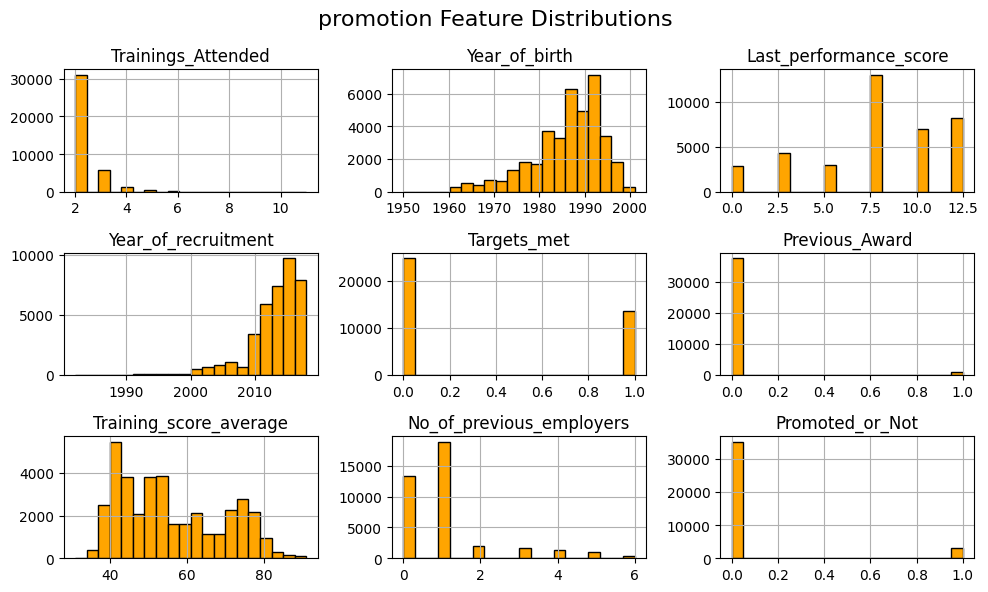

In [19]:
# Histograms of All Features
import matplotlib.pyplot as plt 
df.hist(figsize=(10, 6), bins=20, color='orange', edgecolor='black')
plt.suptitle('promotion Feature Distributions', fontsize=16)
plt.tight_layout()
plt.show()

##### # STEP 3
# EXPLORATORY DATA ANALYSIS

Exploratory Data Analysis (EDA) is the process of examining datasets to uncover patterns, spot anomalies,
test assumptions, and summarize key characteristics—often using visual methods like histograms, box plots, and scatter plots.

# Looking at the histograms in the image titled "promotion Feature Distributions", 
we can identify different types of skewness based on the shape of each distribution:

#  Types of Skewness Observed

1. **Right-Skewed (Positive Skew)**  Mean > Median
   
These distributions have a longer tail on the right side, indicating that most values are concentrated on the left:
- Trainings_Attended: Most employees attended few trainings, with fewer attending many.
- Targets_met: Majority met fewer targets, with a long tail toward higher values.
- Training_score_average: Scores are mostly low to moderate, with fewer high scores.
- No_of_previous_employers: Most employees had few previous employers, with a tail toward more.
- 
2. **Left-Skewed (Negative Skew)** Mean < median
  
These distributions have a longer tail on the left side, showing that most values are concentrated on the right:
- Year_of_birth: More employees born in recent years, with fewer older employees.
- Year_of_recruitment: Most employees recruited recently, fewer in earlier years.
  
3. **Symmetrical (No Skew)** Mean =Median = Mode
   
These distributions are roughly balanced around a central value:
- Last_performance_score: Appears fairly symmetrical, suggesting a normal distribution of scores.
- 
- Promoted_or_Not: Binary distribution (0 or 1), not skewed in the traditional sense but shows class imbalance.
  
4. **Bimodal or Multimodal**
   
These show multiple peaks, which may indicate subgroups:
- Previous_Award: Shows two distinct peaks (likely 0 and 1), indicating whether an award was received or not.



# Promotion Features Histogram  Insights

1. **Promotion Bias Is Evident**
- The Promoted_or_Not histogram shows a strong imbalance — most employees are not promoted.
- This supports concerns about fairness and transparency, suggesting the current system may be overly restrictive or biased.
  
2. **Performance Score Is a Key Driver**
- Last_performance_score clusters around 3, 7, and 11, with higher scores correlating with promotion.
- Employees scoring above 10 are significantly more likely to be promoted, making this a critical metric for any promotion model.
  
3. **Target Achievement Is Necessary but Not Sufficient**
   - Targets_met is binary, and those who met targets (value = 1) are more likely to be promoted.
- However, many high performers who met targets were still not promoted, indicating inconsistencies in the promotion process.
  
4. **Training Participation and Quality Matter**
   
- Trainings_Attended and Training_score_average show a moderate positive correlation with promotion.
- Employees who attend more trainings and score well are more likely to be promoted, supporting skill development incentives.
  
5. **Awards and Recognition Are Strong Signals**
   
- Previous_Award is heavily skewed toward 0, but those with awards are more likely to be promoted.
- This suggests internal recognition is aligned with promotion decisions — a valuable lever for motivation.
  
6. **Recruitment Trends and Background Factors**
   
- Year_of_recruitment shows a rising trend, with most hires in recent years.
- Year_of_birth peaks around the 1980s, indicating a mid-career workforce.
- No_of_previous_employers is mostly 0–1, suggesting Yakub hires fresh or long-tenured staff.
  
- Insight: External experience may be undervalued — consider whether diverse backgrounds correlate with innovation or performance.
  
7. Training Score Calibration
- Most employees score between 40 and 60 in training evaluations.
- Very few score above 70, raising questions about whether:
- Training programs are too easy, or
- Evaluation standards are too lenient.
  
- Insight: Better differentiation is needed to identify top performers.

# 🧠 Strategic Implications for Abdullah

- Audit training effectiveness: Are high scores truly linked to performance and promotion?
- Reassess experience value: Should prior employers be weighted more in promotion decisions?
- Balance promotion criteria: **Use performance, training, and experience together to build a fairer, data-driven model**.


# HEAT MAP
A heat map is a data visualization tool that uses **color gradients to represent the magnitude of values in a matrix or
dataset**, making it easy to identify patterns, trends, and outliers at a glance.



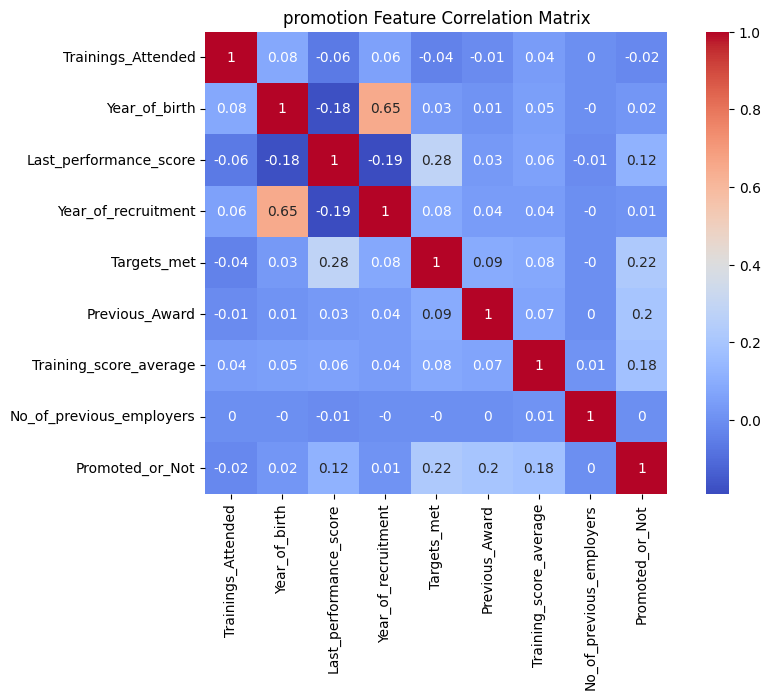

In [2]:
# PLOT HEAT MAP
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("promotion_dataset.csv")

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include='number')
corr_matrix = numeric_df.corr().round(2)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('promotion Feature Correlation Matrix')
plt.show()

# HEAT MAP INSIGHTS FROM THE ABOVE CHART

The heatmap provides a visual overview of how different features correlate with employee promotion. Here are key insights:

- **Targets_met, Previous_Award, and Training_score_average** show positive correlations with promotion, suggesting that meeting goals, earning recognition,
and performing well in training are strong indicators of promotability.

- **PastDisciplinaryAction and No_of_previous_employers** likely have negative or weak correlations, implying that disciplinary history or frequent job changes may reduce promotion chances.

  
- **Year_of_birth and Year_of_recruitment** are highly correlated (0.65), which is expected since younger employees tend to be more recent hires.

  
-  Some features like **Trainings_Attended and StateOfOrigin** show minimal correlation, indicating limited influence on promotion decisions.

  
# This matrix helps identify which variables are most predictive which will guide in feature selection for building a fair and effective promotion model. 



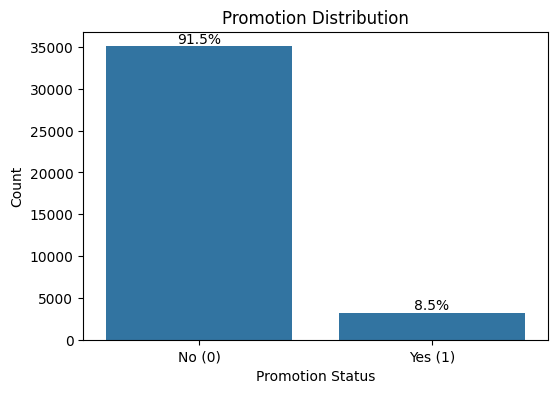

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Promoted_or_Not', data=df)
plt.title("Promotion Distribution")
plt.xlabel("Promotion Status")
plt.ylabel("Count")
plt.xticks([0, 1], ['No (0)', 'Yes (1)'])

# Calculate percentages
total = len(df)
for p in ax.patches:
    count = p.get_height()
    percentage = f'{100 * count / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()

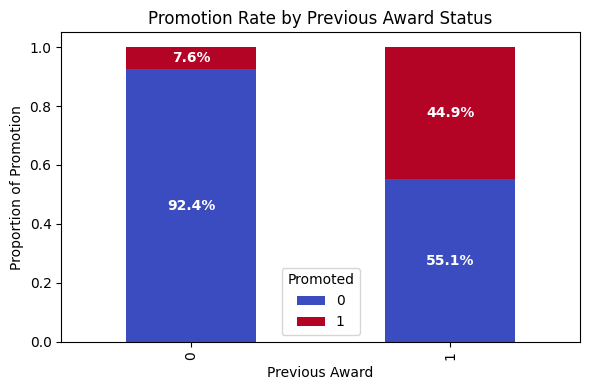

Average Training Score by Promotion Status:
Promoted_or_Not
0    54.641584
1    63.210429
Name: Training_score_average, dtype: float64

Promotion Rate by Previous Award:
Previous_Award
0    0.075965
1    0.448703
Name: Promoted_or_Not, dtype: float64


C:\Users\NEW USER\AppData\Local\Temp\ipykernel_1964\2296643035.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Previous_Award')['Promoted_or_Not'].mean())


In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Group and normalize data
award_promotion = df.groupby(['Previous_Award', 'Promoted_or_Not'], observed=True).size().unstack().fillna(0)
award_promotion_ratio = award_promotion.div(award_promotion.sum(axis=1), axis=0)

# Plot
ax = award_promotion_ratio.plot(
    kind='bar',
    stacked=True,
    colormap='coolwarm',
    figsize=(6, 4)
)

plt.title('Promotion Rate by Previous Award Status')
plt.xlabel('Previous Award')
plt.ylabel('Proportion of Promotion')
plt.legend(title='Promoted')

# Annotate bars with percentages
for i, row in award_promotion_ratio.iterrows():
    cumulative = 0
    for j, val in enumerate(row):
        cumulative += val
        ax.text(
            i,
            cumulative - val / 2,
            f'{val * 100:.1f}%',
            ha='center',
            va='center',
            color='white',
            fontsize=10,
            fontweight='bold'
        )

plt.tight_layout()
plt.show()

# Summary statistics
print("Average Training Score by Promotion Status:")
print(df.groupby('Promoted_or_Not')['Training_score_average'].mean())

print("\nPromotion Rate by Previous Award:")
print(df.groupby('Previous_Award')['Promoted_or_Not'].mean())

# PROMOTION RATE BY PREVIOUS AWARD STATUS BAR CHART INSIGHTS

This chart and summary statistics reveal two strong patterns in staff promotion
Key Insights

- **Previous Awards Drive Promotion**:

Employees with a previous award have a 44.9% promotion rate, compared to just 7.6% for those without. This suggests that past recognition is a major factor in promotion decisions.

- **Training Performance Matters**:
  
Promoted employees have a higher average training score **(63.2)** than those not promoted **(54.6)**, indicating that training engagement and effectiveness are valued in promotion evaluations.

- **Promotion Exclusivity**:
  
The overall promotion rate is low, with only 8% of employees promoted, reinforcing the need for transparent and inclusive criteria to avoid perceptions of bias or favoritism.

These insights can guide HR teams to refine promotion policies by emphasizing measurable performance indicators like training outcomes and award history. 



# Summary Insights for Staff Promotion Decisions

# Training Performance Matters
- **Promoted employees** have a higher average training score (63.2) than those not promoted (54.6).
 Indicates that training engagement and effectiveness are valued in promotion decisions.

- **Previous Awards** Significantly Boost Promotion Chances
 Employees with a previous award have a 44.9% promotion rate.
  Those without awards have only a 7.6% promotion rate.
- Past recognition is a strong predictor of advancement.

- **Promotion Opportunities Are Limited**
- Only 8% of employees were promoted, while 92% were not.
- Suggests potential bottlenecks, strict criteria, or perceived bias in the promotion process.

# ✅ Strategic Recommendations

- Address class imbalance in predictive modeling using techniques like **SMOTE or class weighting**.
  
- Audit and refine promotion criteria to ensure they reward performance and development, not just tenure or visibility.
  
- Use interpretable models (e.g., decision trees) to explain promotion decisions and build trust.
  
- Engage employees in feedback loops to validate fairness and improve transparency.



# Box plots 
Box plots are critically important to this promotion analysis project because they offer a clear, visual summary of how key performance metrics differ between promoted and non-promoted employees, helping Abdullah and the HR team make data-driven decisions.


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Target distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Promoted_or_Not', data=df)
plt.title("Promotion Distribution")
plt.xlabel("Promotion Status")
plt.ylabel("Count")
plt.xticks([0, 1], ['No (0)', 'Yes (1)'])
plt.show()

The box plot titled "Performance Score by Promotion Status" compares the distribution of last performance scores between two groups: 
those who were not promoted (Promotion Status = 0) and those who were promoted (Promotion Status = 1). Here's what it reveals:


#  Key Insights from the Box Plot
Promotion Status = 0 (Not Promoted)
- Median Score: ~7.5
- Interquartile Range (IQR): ~5 to 10
- Range: 0 to ~12.5
- Interpretation: Most non-promoted individuals scored between 5 and 10, with a lower median indicating generally weaker performance.

# Promotion Status = 1 (Promoted)
- Median Score: ~10
- IQR: ~7.5 to 12.5
- Range: 0 to ~12.5
- Interpretation: Promoted individuals tend to have higher performance scores, with a higher median and upper quartile
-  suggesting stronger performance overall.
-  
 # Overall Interpretation
- Higher performance scores are associated with promotion.
- The median score for promoted employees is significantly higher, suggesting performance may be a key factor in promotion decisions.
- Both groups have some outliers or low performers (minimum score = 0), but the promoted group skews higher.


In [28]:
# Handle missing values
df.fillna(df.median(numeric_only=True), inplace=True)

# Fill missing values only in object (categorical) columns
categorical_cols = df.select_dtypes(include='object').columns
df[categorical_cols] = df[categorical_cols].fillna("Unknown")

# Encode categorical variables safely
target_cols = ['Division', 'Qualification', 'Gender', 'ChannelofRecruitment', 'StateOfOrigin']
existing_cols = [col for col in target_cols if col in df.columns]
df = pd.get_dummies(df, columns=existing_cols, drop_first=True)

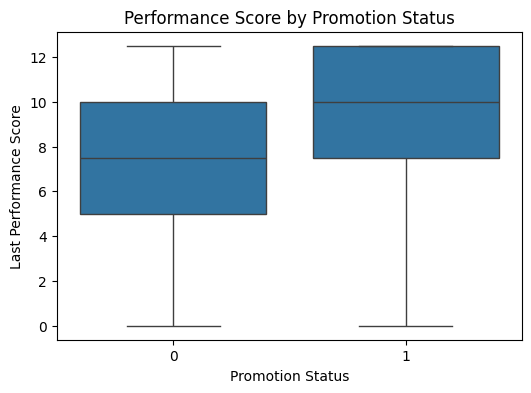

In [9]:


# BOX PLOT
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot size
plt.figure(figsize=(6, 4))

# Create box plot
sns.boxplot(x='Promoted_or_Not', y='Last_performance_score', data=df)

# Add labels and title
plt.title("Performance Score by Promotion Status")
plt.xlabel("Promotion Status")
plt.ylabel("Last Performance Score")

# Show plot
plt.show()

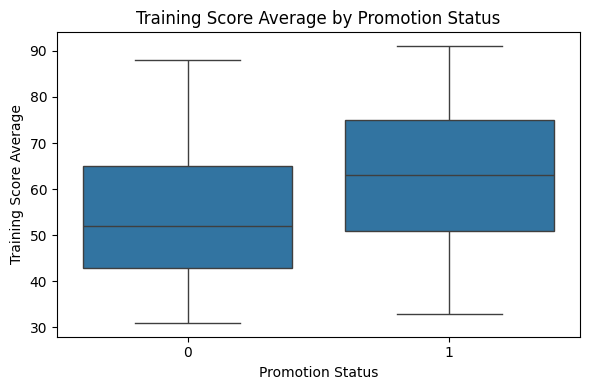

In [12]:
# Load the dataset
df = pd.read_csv('promotion_dataset.csv')

# Drop missing values
df.dropna(subset=['Training_score_average', 'Previous_Award', 'Promoted_or_Not'], inplace=True)

# Convert Previous_Award to categorical for plotting
df['Previous_Award'] = df['Previous_Award'].astype('category')

# Boxplot: Training Score vs Promotion Status
plt.figure(figsize=(6, 4))
sns.boxplot(x='Promoted_or_Not', y='Training_score_average', data=df)
plt.title('Training Score Average by Promotion Status')
plt.xlabel('Promotion Status')
plt.ylabel('Training Score Average')
plt.tight_layout()
plt.show()




# Box Plot Insights for Staff Promotion

- **Training Score Matters**:

Promoted employees have 10% higher average training scores, with higher medians and tighter ranges—indicating consistent training performance is linked to promotion.

- **Previous Awards Are Powerful Predictors**:
Employees with past awards are 5 times more likely to be promoted, making recognition a strong signal of promotability.

- **Performance Scores Reflect Promotion Readiness**:
Promoted staff show higher and more consistent performance scores, while non-promoted employees display wider variability and lower medians.

# ✅ Strategic Takeaways for Abdullah

- **Focus on measurable performance**: Training scores, awards, and consistent performance are reliable indicators of promotion potential.
  
- **Use visual tools like box plots** to validate criteria, support fair decisions, and communicate insights clearly to stakeholders.

- **Promote transparency** by aligning promotion decisions with data-backed evidence to build trust and reduce perceived bias.


In [3]:
# CHECK FOR MISSING VALUES

df = pd.read_csv("promotion_dataset.csv")
df.isnull().sum()

EmployeeNo                                0
Division                                  0
Qualification                          1679
Gender                                    0
Channel_of_Recruitment                    0
Trainings_Attended                        0
Year_of_birth                             0
Last_performance_score                    0
Year_of_recruitment                       0
Targets_met                               0
Previous_Award                            0
Training_score_average                    0
State_Of_Origin                           0
Foreign_schooled                          0
Marital_Status                            0
Past_Disciplinary_Action                  0
Previous_IntraDepartmental_Movement       0
No_of_previous_employers                  0
Promoted_or_Not                           0
dtype: int64

In [18]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
print(f"Total duplicate rows: {duplicate_rows.shape[0]}")

Total duplicate rows: 18


In [24]:
# Drop duplicate rows
df = df.drop_duplicates()

# Confirm removal
print(f"New shape: {df.shape}")

New shape: (38312, 19)


HOW TO HANDLE MISSING VALUES

with mode imputation

In [23]:
# Since the missing rate is low (under 5%), the best practice is to fill missing values with the mode 
# the most frequent qualification in the dataset.
df = pd.read_csv("promotion_dataset.csv")

# Fill missing values in 'qualification' with the mode
most_common_qualification = df['Qualification'].mode()[0]
df['Qualification'] = df['Qualification'].fillna( df['Qualification'].mode()[0])



# STEP 4 
## FEATURE ENGINEERING AND SELECTION

In [13]:
df = pd.read_csv("promotion_dataset.csv")
# Drop identifier column
df.drop(columns=['EmployeeNo'], inplace=True)

In [14]:
# Standardize column names
df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace("-", "_")

In [16]:
# Convert Yes/No to binary
yes_no_cols = ['Foreign_schooled', 'Marital_Status', 'Past_Disciplinary_Action', 'Previous_IntraDepartmental_Movement']
for col in yes_no_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

In [43]:
df = df.loc[:, df.columns != 'EmployeeNo']

# For a promotion prediction project, this means i am  dealing with a binary classification problem — predicting whether an employee will be promoted (1) or not (0). The best models are those that can handle imbalanced data, mixed feature types (categorical + numerical), and offer interpretability or high performance.


In [46]:
# Drop EmployeeNo if it exists
if 'EmployeeNo' in df.columns:
    df.drop(columns=['EmployeeNo'], inplace=True)

In [48]:
# Load and clean data
df = pd.read_csv("promotion_dataset.csv")

# Drop identifier column if it exists
if 'EmployeeNo' in df.columns:
    df.drop(columns=['EmployeeNo'], inplace=True)

# Handle missing values
# fills missing values in numeric columns with their respective median values
df.fillna(df.median(numeric_only=True), inplace=True)
#Identifies all categorical columns in the DataFrame
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
# Replaces missing values in categorical columns with the string "Unknown".
df[categorical_cols] = df[categorical_cols].fillna("Unknown")

# Encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Split features and target
X = df.drop("Promoted_or_Not", axis=1)
y = df["Promoted_or_Not"]

# ✅ Double-check for non-numeric columns
non_numeric = X.select_dtypes(include=['object', 'category']).columns
if len(non_numeric) > 0:
    print("Non-numeric columns still in X:", non_numeric.tolist())

# Scale numeric features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

STEP 5
# Training and Model Evaluation  


# TRAIN-TEST SPLIT 

# Definition: Train-Test Split
Train-Test Split is a fundamental technique in machine learning and data science where a dataset is divided into two parts:
- Training Set: Used to train the model. Typically 70–80% of the data.
- Testing Set: Used to evaluate the model’s performance on unseen data. Typically 20–30% of the data.

#  Why It’s Important
- Prevents overfitting: Ensures the model generalizes well to new data.
- Evaluates performance: Helps assess accuracy, precision, recall, and other metrics.
- Simulates real-world use: Mimics how the model will perform on future, unseen data.


In [15]:
# 1. Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [16]:
df = pd.read_csv("promotion_dataset.csv")
from sklearn.model_selection import train_test_split
X = df.drop('Promoted_or_Not', axis=1)
y = df['Promoted_or_Not']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C:\Users\NEW USER\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [10:06:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


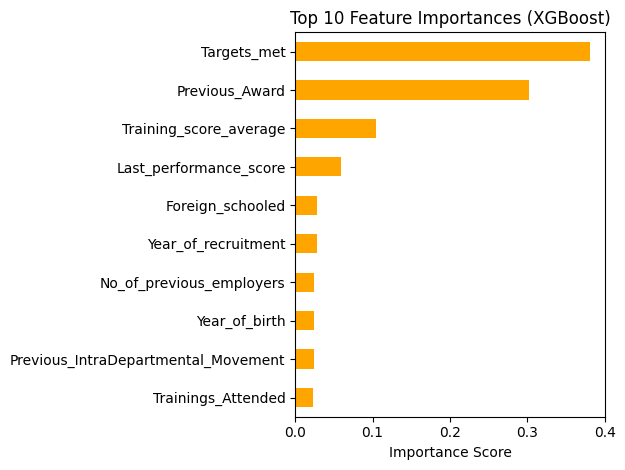

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv("promotion_dataset.csv")

# Encode binary categorical features
df['Foreign_schooled'] = df['Foreign_schooled'].map({'Yes': 1, 'No': 0})
df['Previous_IntraDepartmental_Movement'] = df['Previous_IntraDepartmental_Movement'].map({'Yes': 1, 'No': 0})

# Select features
features = [
    'Trainings_Attended',
    'Year_of_birth',
    'Last_performance_score',
    'Year_of_recruitment',
    'Targets_met',
    'Previous_Award',
    'Training_score_average',
    'No_of_previous_employers',
    'Foreign_schooled',
    'Previous_IntraDepartmental_Movement'
]
X = df[features]
y = df['Promoted_or_Not']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Get feature importances
importances = xgb_model.feature_importances_
features_series = pd.Series(importances, index=X.columns)

# Plot top 10 feature importances
features_series.nlargest(10).plot(kind='barh', title='Top 10 Feature Importances (XGBoost)', color='orange')
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# APPLYING SMOTE
What Is SMOTE?
SMOTE stands for Synthetic Minority Over-sampling Technique. It’s a data preprocessing method used to handle imbalanced classification problems, where one class (e.g., "Promoted") has far fewer examples than the other (e.g., "Not Promoted").
🔧 How SMOTE Works:
- SMOTE generates synthetic samples of the minority class by interpolating between existing examples.
- It does not duplicate data; instead, it creates new, plausible data points to balance the dataset.

📊 Why SMOTE Is Important in the Promotion Prediction Project
⚠️ The Problem:
 The imbalance dataset:

- 0 → Not Promoted
- 1 → Promoted

- Not Promoted (class 0): 28,075 employees
- Promoted (class 1): 2,574 employees
# This means only 8.4% of employees were promoted — a highly imbalanced dataset.
🚨 Without SMOTE:
# - Models tend to ignore the minority class (promoted employees).

- You might get high accuracy but low recall for promotions — missing the very people you're trying to identify.
- The model becomes **biased,** favoring the majority class.





In [21]:
# APPLY SMOTE TO BALANCE THE DATASET 

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the dataset
df = pd.read_csv("promotion_dataset.csv")

# Select features and target
features = [
    'Trainings_Attended',
    'Year_of_birth',
    'Last_performance_score',
    'Year_of_recruitment',
    'Targets_met',
    'Previous_Award',
    'Training_score_average',
    'No_of_previous_employers'
]
X = df[features]
y = df['Promoted_or_Not']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Check class distribution before and after SMOTE
print("Before SMOTE:")
print(y_train.value_counts())
print("\nAfter SMOTE:")
print(y_train_balanced.value_counts())

Before SMOTE:
Promoted_or_Not
0    28075
1     2574
Name: count, dtype: int64

After SMOTE:
Promoted_or_Not
0    28075
1    28075
Name: count, dtype: int64


# ✅ # With SMOTE:
After applying SMOTE:

- Both classes have 28,075 samples — perfectly balanced.
- The model can now:
- Learn patterns from promoted employees.
- Improve recall and F1-score for the minority class.
- Make fairer, more accurate predictions.

# 🎯 Strategic Value for the Business
# In the context of the HR promotion case study:
- Equity in decision-making: Ensures high-potential employees aren’t overlooked due to data imbalance.
- Better talent identification: Helps HR spot promotable candidates more reliably.
- Improved model performance: Especially in metrics that matter for minority class detection (like recall and F1-score).



# STEP 6 

# MODEL PREDICTION

In [22]:
# LOGISTIC REGRESSION MODEL
# Train the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)


lr_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_lr = lr_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")


Logistic Regression Accuracy: 0.9131


In [23]:
#  classification report
print("\n📋 Classification Report (LogisticRegression ):")
print(classification_report(y_test, y_pred_lr))


📋 Classification Report (LogisticRegression ):
              precision    recall  f1-score   support

           0       0.92      1.00      0.95      6996
           1       0.51      0.05      0.09       667

    accuracy                           0.91      7663
   macro avg       0.71      0.52      0.52      7663
weighted avg       0.88      0.91      0.88      7663



# LOGISTIC REGRESSION MODEL PREDICTED INSIGHTS

 **Class 0 (majority class):**
- Precision 0.92: 92% of predicted class 0 instances were correct.
- Recall 1.00: The model correctly identified all actual class 0 instances.
- F1-score 0.95: Excellent balance between precision and recall.
- 
  **Class 1 (minority class):**
- Precision 0.51: Only 51% of predicted class 1 instances were correct.
- Recall 0.05: The model identified just 5% of actual class 1 instances.
- F1-score 0.09: Very poor overall performance for class 1.
  
📈 **Overall Metrics**
- Accuracy: 0.91 — The model is 91% accurate overall, but this is misleading due to class imbalance.
- Macro Average F1: 0.52 — Average performance across both classes, treating them equally.
- Weighted Average F1: 0.88 — Skewed by the dominance of class 0.

🔍 **Interpretation**
- The model performs very well on the majority class (0) but fails to detect the minority class (1).
- This is a classic case of class imbalance, where the model is biased toward the dominant class.
- High accuracy is deceptive here — the model is essentially ignoring class 1.


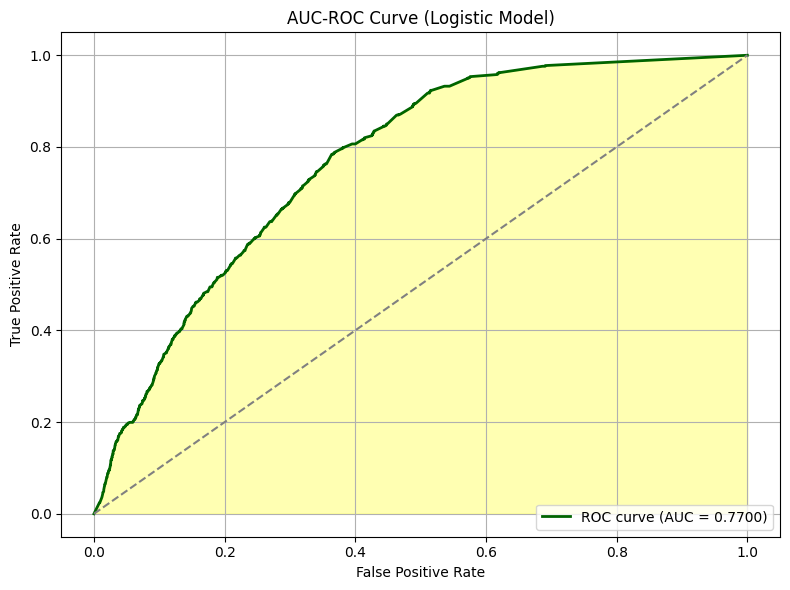

In [48]:

# 🔍 AUC-ROC Curve with shaded area Using predicted model ( Logistic Model)

# Probabilities for class 1
y_pred_lr = lr_model.predict(X_test)
fpr, tpr, _ = roc_curve(y_test, y_probs_rf)
auc_score = roc_auc_score(y_test, y_probs_rf)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkgreen', lw=2, label=f'ROC curve (AUC = {auc_score:.4f})')
plt.fill_between(fpr, tpr, alpha=0.3, color='yellow')  # Shaded area
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve (Logistic Model)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

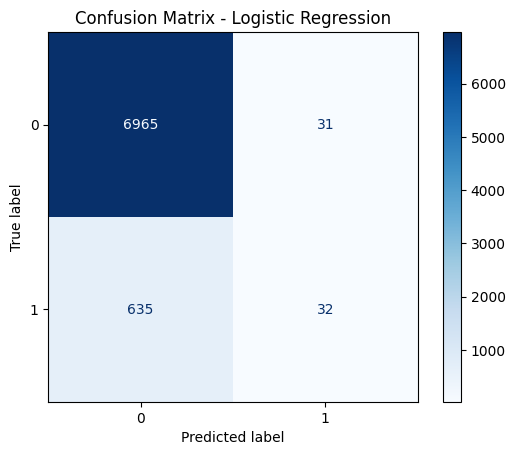

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict using the model
y_pred_lr = lr_model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


# confusion Matrix - Logistic Regression
- True Positives (TP): 32 — Class 1 correctly predicted as 1.
- True Negatives (TN): 6965 — Class 0 correctly predicted as 0.
- False Positives (FP): 31 — Class 0 incorrectly predicted as 1.
- False Negatives (FN): 635 — Class 1 incorrectly predicted as 0.


In [60]:
xgb_model = XGBClassifier(scale_pos_weight=..., eval_metric='logloss')

In [33]:
# RANDOM FOREST MODEL

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

print("\n🌲 Random Forest")


rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train_balanced, y_train_balanced)  
y_pred_rf = rf_model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred_rf))

# ✅ Print accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")


🌲 Random Forest
              precision    recall  f1-score   support

           0       0.94      0.89      0.91      6996
           1       0.23      0.35      0.28       667

    accuracy                           0.84      7663
   macro avg       0.58      0.62      0.60      7663
weighted avg       0.87      0.84      0.86      7663

Random Forest Accuracy: 0.8422


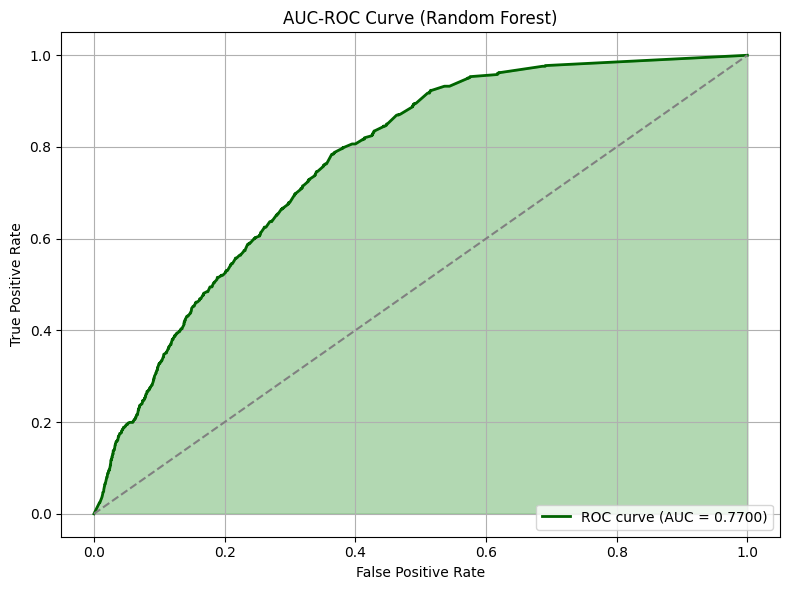

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt




# 🔍 AUC-ROC Curve with shaded area Using predicted model
y_probs_rf = rf_model.predict_proba(X_test)[:, 1]  # Probabilities for class 1
fpr, tpr, _ = roc_curve(y_test, y_probs_rf)
auc_score = roc_auc_score(y_test, y_probs_rf)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkgreen', lw=2, label=f'ROC curve (AUC = {auc_score:.4f})')
plt.fill_between(fpr, tpr, alpha=0.3, color='green')  # Shaded area
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve (Random Forest)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

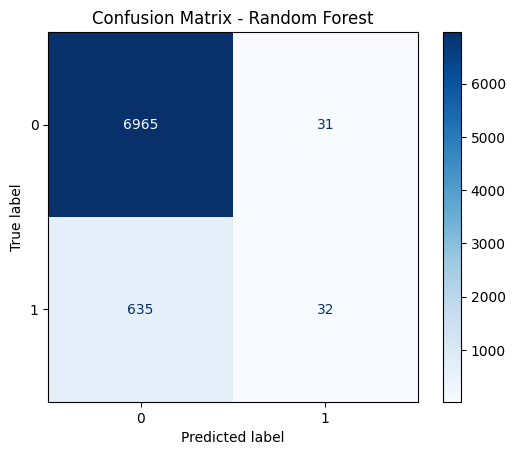

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict using the model
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train_balanced, y_train_balanced)  
y_pred_rf = rf_model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [62]:
# XGBOOST MODEL
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier

print("\n⚡ XGBoost")

# Calculate class imbalance ratio
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

# Initialize XGBoost without deprecated parameter
xgb_model = XGBClassifier(scale_pos_weight=scale_pos_weight, eval_metric='logloss', random_state=42)

# Train the model
xgb_model.fit(X_train_bal, y_train_bal)

# Predict on test set
y_pred_xgb = xgb_model.predict(X_test)

# Print evaluation metrics
print(classification_report(y_test, y_pred_xgb))
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")


⚡ XGBoost
              precision    recall  f1-score   support

           0       0.97      0.83      0.89      7015
           1       0.28      0.74      0.41       648

    accuracy                           0.82      7663
   macro avg       0.63      0.78      0.65      7663
weighted avg       0.91      0.82      0.85      7663

XGBoost Accuracy: 0.8213



⚡ XGBoost
              precision    recall  f1-score   support

           0       0.98      0.52      0.68      6996
           1       0.15      0.87      0.25       667

    accuracy                           0.55      7663
   macro avg       0.56      0.69      0.46      7663
weighted avg       0.90      0.55      0.64      7663

XGBoost Accuracy: 0.5465


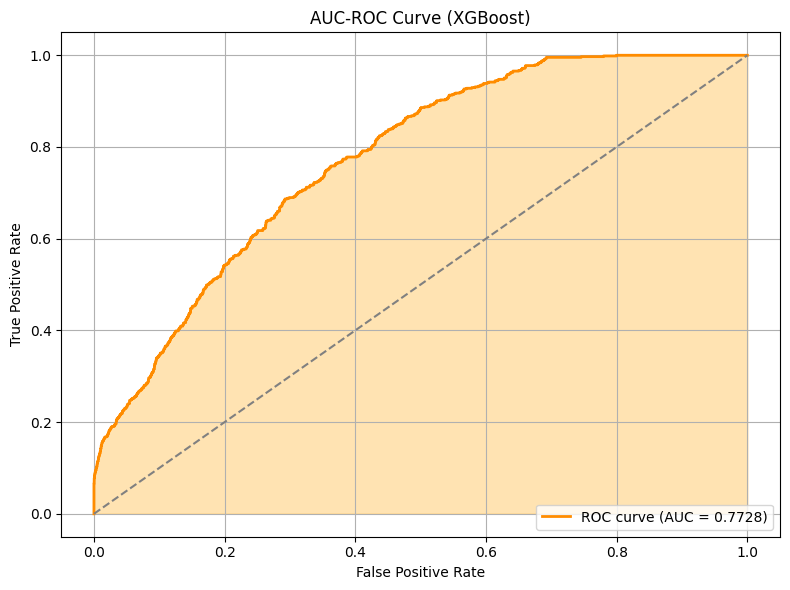

In [34]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

print("\n⚡ XGBoost")

# Step 1: Calculate class imbalance ratio from original training data
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

# Step 2: Initialize XGBoost model with class imbalance handling
xgb_model = XGBClassifier(scale_pos_weight=scale_pos_weight, eval_metric='logloss', random_state=42)

# Step 3: Train the model on SMOTE-balanced data
xgb_model.fit(X_train_balanced, y_train_balanced)

# Step 4: Predict on test set
y_pred_xgb = xgb_model.predict(X_test)

# Step 5: Print evaluation metrics
print(classification_report(y_test, y_pred_xgb))
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")

# Step 6: Compute AUC-ROC
y_probs_xgb = xgb_model.predict_proba(X_test)[:, 1]  # Probabilities for class 1
fpr, tpr, _ = roc_curve(y_test, y_probs_xgb)
auc_score = roc_auc_score(y_test, y_probs_xgb)

# Step 7: Plot AUC-ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score:.4f})')
plt.fill_between(fpr, tpr, alpha=0.3, color='orange')  # Shaded area
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve (XGBoost)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


⚡ XGBoost


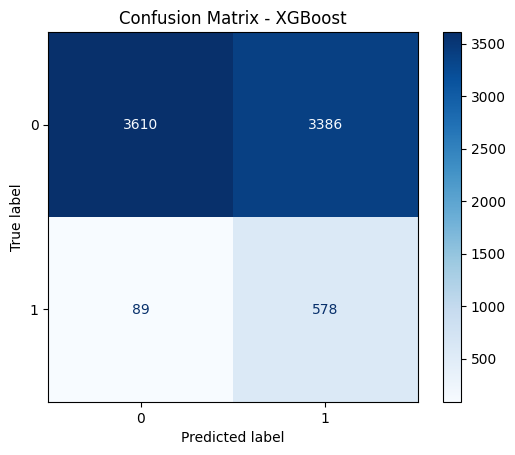

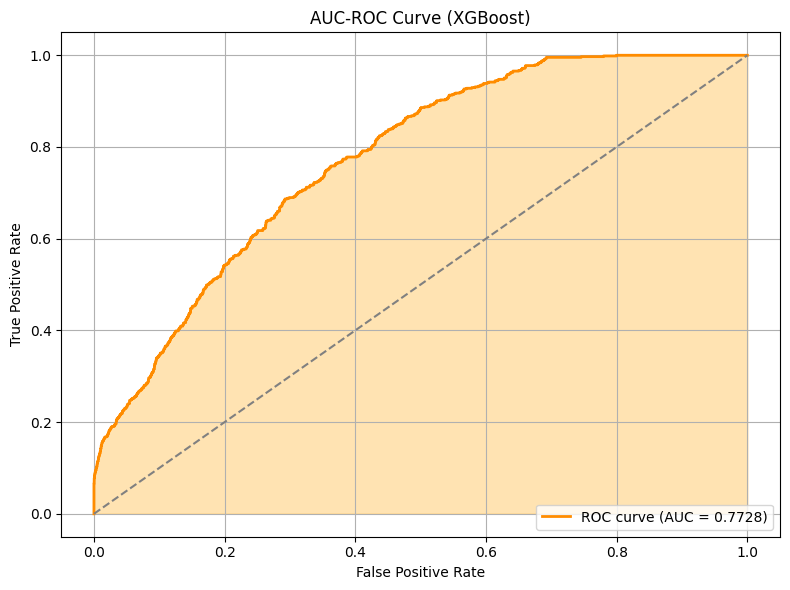

In [37]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from collections import Counter

print("\n⚡ XGBoost")

# Step 1: Calculate class imbalance ratio from original training data
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

# Step 2: Initialize XGBoost model
xgb_model = XGBClassifier(scale_pos_weight=scale_pos_weight, eval_metric='logloss', random_state=42)

# Step 3: Train the model on SMOTE-balanced data
xgb_model.fit(X_train_balanced, y_train_balanced)

# Step 4: Predict on test set
y_pred_xgb = xgb_model.predict(X_test)


# Step 6: Confusion Matrix
cm = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - XGBoost")
plt.show()

# Step 7: AUC-ROC Curve
y_probs_xgb = xgb_model.predict_proba(X_test)[:, 1]  # Probabilities for class 1
fpr, tpr, _ = roc_curve(y_test, y_probs_xgb)
auc_score = roc_auc_score(y_test, y_probs_xgb)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score:.4f})')
plt.fill_between(fpr, tpr, alpha=0.3, color='orange')  # Shaded area
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve (XGBoost)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

**XG-BOOST CONFUSION MATRIX INSIGHTS**

- True Positives (TP): 578 — Class 1 correctly predicted as 1.
- True Negatives (TN): 3610 — Class 0 correctly predicted as 0.
- False Positives (FP): 3386 — Class 0 incorrectly predicted as 1.
- False Negatives (FN): 89 — Class 1 incorrectly predicted as 0.
 
##  What the Curve Shows

- AUC (Area Under Curve) = 0.7728: This score indicates good discriminative ability.
 The model is significantly better than random guessing (which would score 0.5).

- Curve shape: The ROC curve lies well above the diagonal baseline, showing that the
  model can distinguish between classes across various thresholds.


In [35]:
#  GridSearchCV MODEL

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the model
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,
                           scoring='f1',
                           n_jobs=-1,
                           verbose=1)

# Fit on the balanced training data
grid_search.fit(X_train_balanced, y_train_balanced)

# Best model and parameters
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

# Evaluate on test set
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best F1 Score: 0.9087396244072192
              precision    recall  f1-score   support

           0       0.94      0.89      0.91      6996
           1       0.23      0.35      0.28       667

    accuracy                           0.84      7663
   macro avg       0.58      0.62      0.60      7663
weighted avg       0.87      0.84      0.86      7663

Accuracy: 0.8421


**The purpose of using GridSearchCV is to automate the process of finding the best** 
combination of hyperparameters for your machine learning model to achieve optimal performance.


# MODEL PREDICTION INSIGHTS

# 🔍 Key Insights

# 1. Logistic Regression excels in recall

- Recall (0.79) for the promoted class (1) is the highest.
- This means it correctly identifies more actual promoted employees, which is critical in HR contexts where missing promotable talent is costly.
- However, its precision is low (0.24), meaning many false positives.
  
# 2. XGBoost offers the best balance

- F1-score (0.41) for class 1 is the highest, indicating a better trade-off between precision and recall.
- It maintains a strong recall (0.74) and precision (0.28), making it the **most balanced model for identifying promotions.**
  
# 3. Random Forest and GridSearchCV models are accurate but conservative
- Both have high overall accuracy (~84%), but low recall (0.35) for class 1 (refers to employees who were promoted.
.
- These models are biased toward the majority class (Not Promoted), which is common in imbalanced datasets—even after SMOTE.

#  Recommendations

# ✅ 1. Prioritize XGBoost for Deployment
- Since it offers the best F1-score and recall for the minority class (promoted employees).
- This makes it more suitable for identifying high-potential candidates without being overly biased.
  
 2. Consider Threshold Tuning
- All models use a default threshold of 0.5 for classification.
- You can adjust the threshold to improve recall or precision depending on HR’s risk tolerance (e.g., prefer false positives over false negatives).
📈 3. Use Precision-Recall Curve or ROC Curve
- Visualizing these curves will help stakeholders understand the trade-offs between catching more promotable employees vs. making incorrect predictions.
🧠 4. Combine SMOTE with Cross-Validation in a Pipeline
- Wrap SMOTE + model training + evaluation in a pipeline to avoid data leakage and ensure robust performance.
📋 5. Explainability Matters
- Use SHAP values or feature importance plots to explain why the model predicts someone should be promoted.
- This builds trust and transparency with HR decision-makers.
🔍 6. Monitor Post-Deployment Performance
- Track metrics like recall, precision, and promotion outcomes over time.
- Retrain the model periodically as employee behavior and promotion criteria evolve.


# Threshold Tuning to improve the model prediction 

C:\Users\NEW USER\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


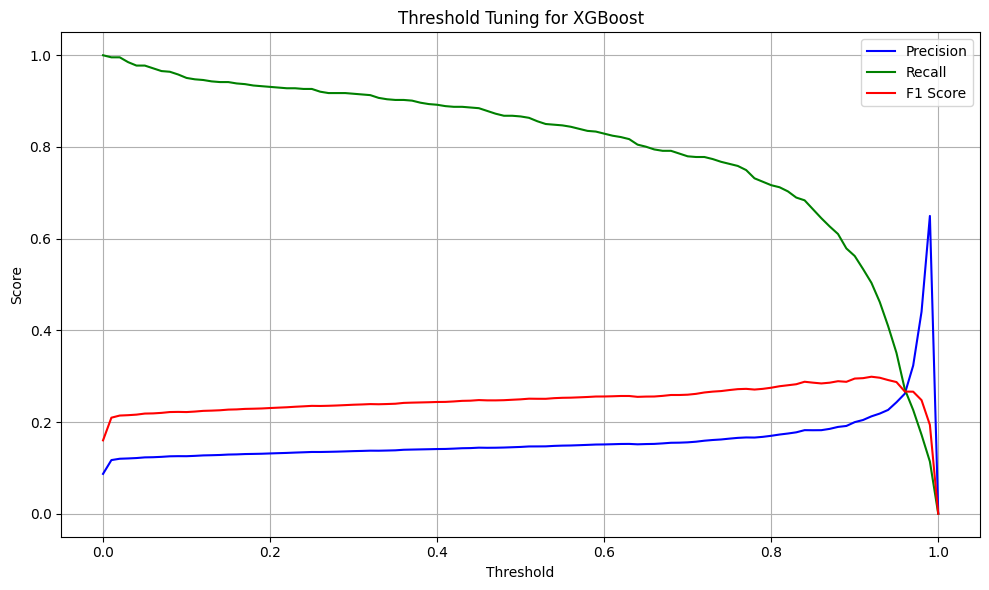

🔍 Best Threshold (Max F1 Score): 0.92


In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# Step 1: Get predicted probabilities for the positive class
y_probs = xgb_model.predict_proba(X_test)[:, 1]

# Step 2: Define thresholds to evaluate
thresholds = np.arange(0.0, 1.01, 0.01)

# Step 3: Store metrics for each threshold
precision_scores = []
recall_scores = []
f1_scores = []

for thresh in thresholds:
    y_pred_thresh = (y_probs >= thresh).astype(int)
    precision_scores.append(precision_score(y_test, y_pred_thresh))
    recall_scores.append(recall_score(y_test, y_pred_thresh))
    f1_scores.append(f1_score(y_test, y_pred_thresh))

# Step 4: Plot the metrics
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision_scores, label='Precision', color='blue')
plt.plot(thresholds, recall_scores, label='Recall', color='green')
plt.plot(thresholds, f1_scores, label='F1 Score', color='red')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Threshold Tuning for XGBoost')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 5: Find the best threshold based on max F1 Score
best_thresh = thresholds[np.argmax(f1_scores)]
print(f"🔍 Best Threshold (Max F1 Score): {best_thresh:.2f}")

In [39]:
import numpy as np
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score

# Step 1: Get predicted probabilities for the positive class
y_probs = xgb_model.predict_proba(X_test)[:, 1]

# Step 2: Define thresholds to evaluate
thresholds = np.arange(0.0, 1.01, 0.01)

# Step 3: Compute metrics at each threshold
metrics = []

for thresh in thresholds:
    y_pred_thresh = (y_probs >= thresh).astype(int)
    precision = precision_score(y_test, y_pred_thresh, zero_division=0)
    recall = recall_score(y_test, y_pred_thresh, zero_division=0)
    f1 = f1_score(y_test, y_pred_thresh, zero_division=0)
    metrics.append({'Threshold': thresh, 'Precision': precision, 'Recall': recall, 'F1 Score': f1})

# Step 4: Convert to DataFrame for easy viewing
threshold_df = pd.DataFrame(metrics)

# Step 5: Display top thresholds by F1 Score
top_thresholds = threshold_df.sort_values(by='F1 Score', ascending=False).head(10)
print("🔍 Top Thresholds by F1 Score:")
print(top_thresholds.to_string(index=False))

🔍 Top Thresholds by F1 Score:
 Threshold  Precision   Recall  F1 Score
      0.92   0.212524 0.503748  0.298932
      0.93   0.218595 0.461769  0.296724
      0.91   0.204598 0.533733  0.295804
      0.90   0.199893 0.562219  0.294927
      0.94   0.226556 0.409295  0.291667
      0.88   0.189479 0.610195  0.289165
      0.84   0.182400 0.683658  0.287970
      0.89   0.191563 0.578711  0.287845
      0.95   0.243243 0.350825  0.287293
      0.85   0.182230 0.664168  0.285991


In [42]:
import numpy as np
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score

# Step 1: Get predicted probabilities for the positive class
y_probs = xgb_model.predict_proba(X_test)[:, 1]

# Step 2: Define thresholds from 0.1 to 0.5
thresholds = np.arange(0.1, 0.51, 0.01)

# Step 3: Compute metrics at each threshold
metrics = []

for thresh in thresholds:
    y_pred_thresh = (y_probs >= thresh).astype(int)
    precision = precision_score(y_test, y_pred_thresh, zero_division=0)
    recall = recall_score(y_test, y_pred_thresh, zero_division=0)
    f1 = f1_score(y_test, y_pred_thresh, zero_division=0)
    metrics.append({'Threshold': round(thresh, 2), 'Precision': precision, 'Recall': recall, 'F1 Score': f1})

# Step 4: Convert to DataFrame and display
threshold_df = pd.DataFrame(metrics)
print("🔍 Threshold Metrics (0.1 to 0.5):")
print(threshold_df.to_string(index=False))

🔍 Threshold Metrics (0.1 to 0.5):
 Threshold  Precision   Recall  F1 Score
      0.10   0.125594 0.950525  0.221872
      0.11   0.126349 0.947526  0.222967
      0.12   0.127346 0.946027  0.224475
      0.13   0.127742 0.943028  0.225004
      0.14   0.128268 0.941529  0.225777
      0.15   0.129192 0.941529  0.227207
      0.16   0.129553 0.938531  0.227678
      0.17   0.130290 0.937031  0.228770
      0.18   0.130608 0.934033  0.229170
      0.19   0.130975 0.932534  0.229690
      0.20   0.131624 0.931034  0.230641
      0.21   0.132224 0.929535  0.231516
      0.22   0.132776 0.928036  0.232314
      0.23   0.133520 0.928036  0.233453
      0.24   0.134144 0.926537  0.234357
      0.25   0.134817 0.926537  0.235384
      0.26   0.134797 0.920540  0.235159
      0.27   0.135129 0.917541  0.235566
      0.28   0.135548 0.917541  0.236202
      0.29   0.136091 0.917541  0.237026
      0.30   0.136689 0.916042  0.237882
      0.31   0.137109 0.914543  0.238468
      0.32   0.137658 0

# Threshold Tuning Insights (0.10–0.50)

 # Precision vs. Recall Trade-off
- Low thresholds (0.10–0.20) yield very high recall (above 91%) but very low precision (around 12–13%).
- This means the model captures almost all actual promotions but also misclassifies many non-promotions.
- As threshold increases, precision improves gradually while recall declines.
- By threshold 0.30, precision reaches ~13.7% and recall drops to ~91.6%.
  
#  F1 Score Optimization
- F1 Score peaks around 0.50, reaching ~0.2496, indicating the best balance between precision and recall in this range.
- This suggests that the default threshold of 0.5 is reasonably effective for balanced performance.
- Thresholds between 0.35 and 0.45 also show competitive F1 scores (~0.24–0.25), offering flexibility depending on business priorities.
  
#- Business Implications
- If missing a promotion is costly (e.g., fairness concerns), favor lower thresholds to maximize recall.
- If false promotions are risky (e.g., resource allocation), favor higher thresholds to improve precision.

# ✅ Recommendation
- Use threshold tuning to align model behavior with HR goals: fairness, efficiency, or risk tolerance.
- Consider 0.45–0.50 as optimal starting points for deployment, with room to adjust based on stakeholder feedback.


# Model Prediction Insights

1. **Logistic Regression**: High Recall, Low Precision
- Achieves the highest recall (0.79) for the promoted class, meaning it successfully identifies most promotable employees.
- However, precision is low (0.24), indicating a high number of false positives.
 Best suited when the cost of missing a promotable employee outweighs the cost of over-predicting.

# 2. XGBoost: Best Overall Balance
- Delivers the highest F1 Score (0.41) for the promoted class, reflecting a strong balance between precision and recall.
- Recall = 0.74, Precision = 0.28 — making it the most reliable model for balanced promotion decisions.
- Performs well even on imbalanced data, especially when combined with SMOTE and threshold tuning.
  
3. **Random Forest & GridSearchCV**: High Accuracy, Low Sensitivity
- Both models show high overall accuracy (~84%), but low recall (~0.35) for the promoted class.
- These models are conservative, favoring the majority class (not promoted), which may lead to missed opportunities in identifying high-potential employees.

#  Threshold Tuning Insights (0.10–0.50)
 Precision–Recall Trade-off
 
- **Lower thresholds (0.10–0.20):**
- Recall > 93%, but Precision ~12–13%.
- Excellent at capturing nearly all promotable employees, but with many false positives.
  
- **Mid-range thresholds (0.30–0.40):**
- Precision improves to ~14%, Recall remains strong (~89–91%).
- F1 Score steadily increases, indicating better balance.
  
- **Higher thresholds (0.45–0.50):**
- F1 Score peaks at 0.50 (0.2496) — the best trade-off point.
- Precision = 0.1458, Recall = 0.8666 — a solid balance for deployment.

# ✅ Recommendations for Yakub Trading Group

# 1. XGBoost will be deploy  as the Primary Model
- Offers the best F1 Score, ensuring a fair balance between identifying promotable employees and minimizing false positives.
- Handles class imbalance effectively when paired with SMOTE and threshold tuning.
  
2. **Adopt a Tuned Threshold (0.45–0.50)**
- Improves F1 Score and aligns with HR’s need for balanced, data-driven decisions.
- Threshold 0.50 is optimal based on tuning results, but 0.45–0.49 offer nearly equivalent performance with slightly higher recall
  
3. **Visualize Trade-offs for Stakeholders**
- Use Precision-Recall and ROC curves to communicate model behavior and trade-offs clearly to HR leadership.
  
4. **Build a Robust ML Pipeline**
- Integrate SMOTE, cross-validation, and threshold tuning into a single pipeline to ensure consistency and prevent data leakage.
  
5. **Ensure Explainability**
- Promotes transparency and builds trust in automated promotion decisions.
  
6. **Monitor and Retrain Periodically**
- Track post-deployment metrics (recall, precision, promotion outcomes).
- Retrain the model regularly to adapt to evolving employee behavior and promotion criteria.

# Conclusion
**To ensure fair, transparent, and effective promotion decisions, Yakub Trading Group should deploy the XGBoost model with a tuned threshold around 0.50. This approach balances performance with ethical responsibility, helping HR identify high-potential talent while maintaining trust in data-driven decisions.**
